# Removing Outliers in Data Analysis using Z-Score

In this example, we will be using the Wine dataset to demonstrate how to remove outliers using the **Z-Score method** in Python. The Wine dataset contains information about various chemical properties of wine samples and their corresponding quality scores.

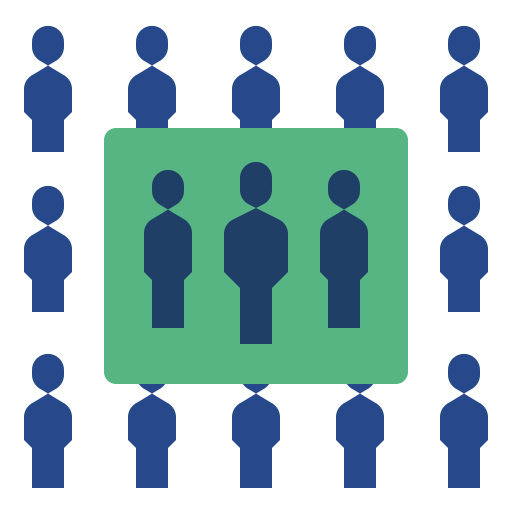

#### Table of content:

- Load the Wine dataset
- Compute the Z-score for each feature
- Remove observations with Z-scores beyond a certain threshold
- Visualize the results

Load the Wine dataset

In [2]:
import pandas as pd
from sklearn.datasets import load_wine

# Load the Wine dataset
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['Quality'] = wine.target


Compute the Z-score for each feature

In [3]:
import numpy as np

# Compute the mean and standard deviation of each feature
mean = df.mean()
std = df.std()

# Compute the Z-score for each observation
z = (df - mean) / std

Remove observations with Z-scores beyond a certain threshold

In [4]:
# Set a threshold for the Z-score
threshold = 3

# Remove observations with Z-scores beyond the threshold
df_without_outliers = df[(np.abs(z) < threshold).all(axis=1)]


Visualize the results

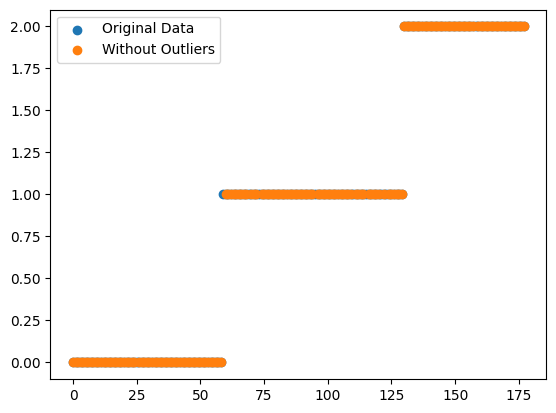

In [5]:
import matplotlib.pyplot as plt

# Plot the original data and the data without outliers
plt.scatter(df.index, df['Quality'], label='Original Data')
plt.scatter(df_without_outliers.index, df_without_outliers['Quality'], label='Without Outliers')

# Add a legend and display the plot
plt.legend()
plt.show()

**Note:** The value of the threshold can be adjusted as needed. In this example, we used a threshold of 3, but in some cases, a different threshold may be more appropriate.

In [7]:
import plotly.express as px


# Plot the original data and the data without outliers using Plotly
fig = px.scatter(x=df.index, y=df['Quality'], labels={'x':'Sample Number', 'y':'Quality Score'},
                 title='Original Data')
fig.add_scatter(x=df_without_outliers.index, y=df_without_outliers['Quality'], 
                mode='markers', name='Without Outliers')
fig.show()
